In [21]:
# Ridam Pal PhD19201
# Harsh Bandhey 17234
# Vishesh Agrawal 18420

# Importing libraries

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

C:\Users\Ridam\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Ridam\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Loading the Training files as dataframe

In [7]:
ndna_file = 'final_amino_acid_result_ndna.csv'

In [8]:
dna_file = 'final_amino_acid_result_dna.csv'

In [9]:
dna = pd.read_csv(dna_file,skiprows= lambda x: True if x%2 else False)

In [10]:
ndna = pd.read_csv(ndna_file,skiprows= lambda x: True if x%2 else False)

In [11]:
dna.shape

(1299, 21)

In [12]:
ndna.shape

(1750, 21)

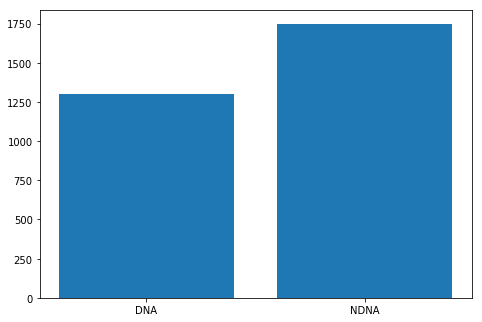

In [20]:
## ploting the frequency of labels for DNA and NDNA 
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label = ['DNA', 'NDNA']
freq = [1299,1750]
ax.bar(label,freq)
plt.show()

In [8]:
label = pd.DataFrame([1 for i in range(1299)]+[0 for i in range(1750)])

In [9]:
data = pd.concat([dna,ndna])

In [10]:
data

,ID,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,...,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,D1001,9.42,0.00,7.97,9.42,0.72,7.25,2.17,5.07,4.35,...,4.35,2.90,5.07,2.17,2.90,6.52,4.35,7.25,0.00,0.72
1,D1005,17.46,1.59,0.00,7.94,0.00,1.59,6.35,3.17,6.35,...,1.59,4.76,3.17,7.94,9.52,7.94,4.76,4.76,1.59,1.59
2,D1008,6.90,6.90,6.90,3.45,3.45,3.45,6.90,6.90,0.00,...,0.00,0.00,6.90,0.00,20.69,10.34,6.90,3.45,0.00,3.45
3,D1010,5.43,2.17,2.72,6.52,2.72,8.70,3.26,4.35,8.15,...,2.72,2.17,7.61,5.98,7.07,8.15,3.80,7.07,0.00,2.17
4,D1015,6.17,4.94,2.47,3.09,2.47,11.73,6.79,3.70,2.47,...,0.00,6.17,8.02,4.94,4.32,3.09,6.79,8.64,3.09,2.47
5,D1019,13.27,2.04,4.08,8.16,3.06,3.06,1.02,7.14,7.14,...,1.02,3.06,3.06,1.02,13.27,4.08,3.06,6.12,0.00,3.06
6,D1022,11.58,0.00,3.16,11.58,1.05,5.26,0.00,5.26,10.53,...,0.00,2.11,3.16,1.05,9.47,4.21,5.26,11.58,0.00,4.21
7,D1025,6.06,0.00,7.58,10.61,3.03,7.58,0.00,1.52,21.21,...,4.55,1.52,1.52,0.00,6.06,4.55,4.55,10.61,1.52,3.03
8,D1028,6.80,2.72,4.08,4.08,5.44,11.56,2.04,4.08,4.76,...,2.04,2.72,8.16,2.72,6.80,4.76,6.80,7.48,1.36,2.04
9,D1032,3.76,1.08,6.45,8.60,2.15,3.23,1.08,4.30,7.53,...,4.84,4.30,2.15,13.44,6.45,4.84,4.30,6.45,1.08,1.61


In [11]:
## labels for the train data
label.T

,0,1,2,3,4,5,6,7,8,9,...,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
data.index = data.ID

In [13]:
data = data.drop('ID',axis=1)

In [14]:
# head of the final dataframe
data.head()

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
ID,,,,,,,,,,,,,,,,,,,,
D1001,9.42,0.00,7.97,9.42,0.72,7.25,2.17,5.07,4.35,17.39,4.35,2.90,5.07,2.17,2.90,6.52,4.35,7.25,0.00,0.72
D1005,17.46,1.59,0.00,7.94,0.00,1.59,6.35,3.17,6.35,7.94,1.59,4.76,3.17,7.94,9.52,7.94,4.76,4.76,1.59,1.59
D1008,6.90,6.90,6.90,3.45,3.45,3.45,6.90,6.90,0.00,3.45,0.00,0.00,6.90,0.00,20.69,10.34,6.90,3.45,0.00,3.45
D1010,5.43,2.17,2.72,6.52,2.72,8.70,3.26,4.35,8.15,9.24,2.72,2.17,7.61,5.98,7.07,8.15,3.80,7.07,0.00,2.17
D1015,6.17,4.94,2.47,3.09,2.47,11.73,6.79,3.70,2.47,8.64,0.00,6.17,8.02,4.94,4.32,3.09,6.79,8.64,3.09,2.47


In [15]:
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(data)

# Training the model on the data

In [26]:
## XGBoost classifier for training the model with best parameter for Grid Search 
clf = XGBClassifier(learning_rate = 0.1, max_depth = 15, n_estimators = 400)
# Train the classifier on data1's feature and target data
clf.fit(data, label) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
clf.score(data,label)

1.0

# Finding the best parameter using GridSearch

In [21]:
##parameters for the Grid-Search
param_grid = {'n_estimators': range(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1.0],
              'max_depth': range(5, 20, 5)
              }

## Cross validation is taking place with Grid-Search
## 5-fold Cross validation has been done
grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(data,label)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Ridam\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.667, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.651, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.711, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.662, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.700, total=   0.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.693, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.652, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.713, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.680, 

[CV]  learning_rate=0.01, max_depth=15, n_estimators=400, score=0.707, total=   3.4s
[CV] learning_rate=0.01, max_depth=15, n_estimators=400 ..............
[CV]  learning_rate=0.01, max_depth=15, n_estimators=400, score=0.682, total=   3.4s
[CV] learning_rate=0.01, max_depth=15, n_estimators=400 ..............
[CV]  learning_rate=0.01, max_depth=15, n_estimators=400, score=0.705, total=   3.4s
[CV] learning_rate=0.01, max_depth=15, n_estimators=400 ..............
[CV]  learning_rate=0.01, max_depth=15, n_estimators=400, score=0.689, total=   3.4s
[CV] learning_rate=0.01, max_depth=15, n_estimators=400 ..............
[CV]  learning_rate=0.01, max_depth=15, n_estimators=400, score=0.708, total=   3.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=0.703, total=   0.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=5, n_estimators=100, score=0.68

[CV]  learning_rate=0.1, max_depth=15, n_estimators=200, score=0.697, total=   1.1s
[CV] learning_rate=0.1, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=200, score=0.698, total=   1.1s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, score=0.716, total=   1.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, score=0.687, total=   1.4s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, score=0.718, total=   1.6s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, score=0.703, total=   1.5s
[CV] learning_rate=0.1, max_depth=15, n_estimators=300 ...............
[CV]  learning_rate=0.1, max_depth=15, n_estimators=300, score=0.708, 

[CV]  learning_rate=1.0, max_depth=15, n_estimators=100, score=0.654, total=   0.4s
[CV] learning_rate=1.0, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=100, score=0.703, total=   0.4s
[CV] learning_rate=1.0, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=100, score=0.674, total=   0.4s
[CV] learning_rate=1.0, max_depth=15, n_estimators=100 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=100, score=0.721, total=   0.3s
[CV] learning_rate=1.0, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=200, score=0.705, total=   0.5s
[CV] learning_rate=1.0, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=200, score=0.644, total=   0.5s
[CV] learning_rate=1.0, max_depth=15, n_estimators=200 ...............
[CV]  learning_rate=1.0, max_depth=15, n_estimators=200, score=0.697, 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.0min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [25]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 400}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Loading the Test files DataFrame

In [28]:
test_df = pd.read_csv('final_amino_acid_result_valid.csv', skiprows= lambda x: True if x%2 else False)

In [29]:
lab = test_df.ID

In [30]:
test_df.index = test_df.ID

In [31]:
test_df = test_df.drop('ID',axis=1)

In [32]:
test_df.shape

(1071, 20)

In [33]:
predict = clf.predict(test_df)

In [34]:
predict.shape

(1071,)

In [35]:
# lab = pd.DataFrame([i for i in range(5000,5000+1072)])

In [36]:
predict = pd.DataFrame(predict)

In [37]:
predict = predict.replace(0,-1)

In [38]:
lab

0       5000
1       5001
2       5002
3       5003
4       5004
5       5005
6       5006
7       5007
8       5008
9       5009
10      5010
11      5011
12      5012
13      5013
14      5014
15      5015
16      5016
17      5017
18      5018
19      5019
20      5020
21      5021
22      5022
23      5023
24      5024
25      5025
26      5026
27      5028
28      5029
29      5030
        ... 
1041    6070
1042    6071
1043    6072
1044    6073
1045    6074
1046    6075
1047    6076
1048    6077
1049    6078
1050    6079
1051    6080
1052    6081
1053    6082
1054    6083
1055    6084
1056    6085
1057    6086
1058    6087
1059    6088
1060    6089
1061    6090
1062    6091
1063    6092
1064    6093
1065    6094
1066    6095
1067    6096
1068    6097
1069    6098
1070    6099
Name: ID, Length: 1071, dtype: int64

In [39]:
output = pd.concat([lab,predict],axis=1)

In [40]:
#snapshot of the output file 
output

,ID,0
0,5000,-1
1,5001,1
2,5002,1
3,5003,1
4,5004,-1
5,5005,-1
6,5006,-1
7,5007,1
8,5008,-1
9,5009,-1


In [41]:
#final output file in csv form
output.to_csv('output7.csv', header=['ID','Lable'], index=False)